# Biol 359  |  Cross-Validation
### Spring 2021, Week 9

<hr style="border:2px solid gray"> </hr>


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn as sk
import urllib.request
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)}) 
sns.set_style("whitegrid",  {'axes.linewidth': 2, 'axes.edgecolor':'black'})

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
# NOTE:
# `breast_raw.data`: Stores the raw data (breast feature data)
# `breast_raw.feature_names`: Stores the raw data feature labels
# `breast_raw.target`: Stores the tumor type (0 = 'benign', 1 = 'malignant')
# `breast_raw.target_names`: Stores the tumor type labels ('benign' or 'malignant')
# `breast_raw.DESCR`: Description of the data
breast_raw = load_breast_cancer()

# Uncomment the following line to print a description of the data
# print(breast_raw.DESCR)


In [5]:
# Feature data set
features = pd.DataFrame(breast_raw.data, columns=breast_raw.feature_names)
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Tumor label data set
tumor = pd.DataFrame(breast_raw.target, columns=['tumor'])
# tumor_set.replace({'tumor type': {0: 'benign', 1: 'malignant'}}, inplace=True)
tumor.head()

,tumor
0,0
1,0
2,0
3,0
4,0


In [7]:
# Concantenate into one data frame
breast = pd.concat([features, tumor], axis=1)
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


ValueError: num must be 1 <= num <= 16, not 17

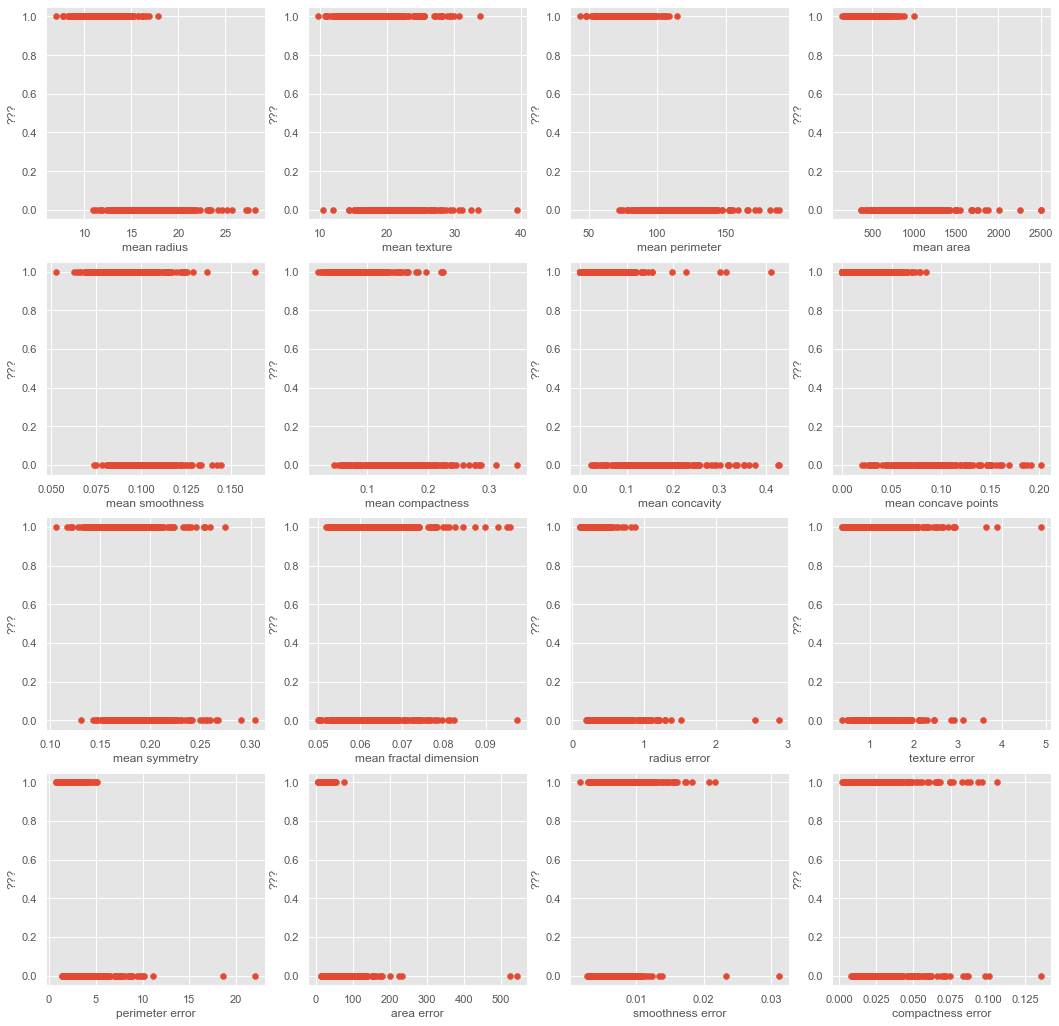

In [8]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))
 
for index, feature_name in enumerate(breast_raw.feature_names):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(breast_raw.data[:, index], breast_raw.target)
    ax.set_ylabel('???', size = 12)
    ax.set_xlabel(feature_name, size = 12)
 
plt.show()

In [ ]:
# input
X = features.iloc[:, :-1]
 
#output
Y = tumor.iloc[:, -1]

In [ ]:
split = 0.2
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    tumor, test_size=split, random_state=5)
x_train

print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

In [ ]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
 
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

In [ ]:
r2 = lm_elasticnet.score(X_train, y_train)
print(f"R^2 = {r2}")

In [ ]:
q2 = lm_elasticnet.score(X_test, y_test)
print(f"Q^2 = {q2}")

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

In [ ]:
def polynomial_feature_example(x, y, regularization = None, reg_alpha=1, degrees=6):
    """
    Perform regularization on a polynomial feature set. 
    """
    poly_transform = PolynomialFeatures(degree=degrees, include_bias = False)
    x_poly = poly_transform.fit_transform(x.reshape(-1,1))
    
    #Regularization techniques need to be scaled in order to work properly
    x_scaler = StandardScaler().fit(x_poly)
    y_scaler = StandardScaler().fit(y.reshape(-1,1))
    x_poly_z = x_scaler.transform(x_poly)
    y_z = y_scaler.transform(y.reshape(-1,1))
    
    #Code to perform the model fitting and parameter estimation
    if regularization is None:
        #Least Squares problem
        plt.suptitle('Linear Regression', fontsize=20, fontweight='bold')
        lm_poly = linear_model.LinearRegression(fit_intercept=True)
        lm_poly.fit(x_poly_z,y_z)
        
    elif regularization is 'L1':
        #LASSO problem
        plt.suptitle('LASSO', fontsize=20, fontweight='bold')       
        lm_poly = linear_model.Lasso(alpha = reg_alpha, max_iter=1e8, fit_intercept=True)
        lm_poly.fit(x_poly_z,y_z)    
        
    elif regularization is 'L2':
        #ridge problem
        plt.suptitle('Ridge', fontsize=20, fontweight='bold')
        lm_poly = linear_model.Ridge(alpha = reg_alpha, max_iter=1e5, fit_intercept=True)
        lm_poly.fit(x_poly_z,y_z)
    
    
    x_model = np.linspace(min(x), max(x), 150).reshape(-1,1)
    x_model_transform = poly_transform.fit_transform(x_model)
    x_model_transform_z = x_scaler.transform(x_model_transform)
    
    
    y_model = lm_poly.predict(x_model_transform_z)*y_scaler.scale_ + y_scaler.mean_
    
    #********************************************************************************
    # Coefficients from scaled model can be transformed back into original units
    # This code is outside the scope of this class and can be ignored. 
    
    unscaled_coefficients = (lm_poly.coef_ * y_scaler.scale_ / x_scaler.scale_).flatten()
    
    poly_terms = [r'$({0:.3f})x ^ {{{1}}}$'.format(coef, i+1) for i, coef in enumerate(unscaled_coefficients)
                 if coef != 0]
    
    unscaled_intercept = lm_poly.intercept_*y_scaler.scale_ + y_scaler.mean_ \
                            - sum(unscaled_coefficients*x_scaler.mean_)
        
    intercept_str = r'${0:.1f} + $'.format(unscaled_intercept[0])
    title =  intercept_str + r'$+$'.join(poly_terms)
    #********************************************************************************
    
    plot_model(x_data, y_data, x_model, y_model, title=title)
    

#### Define response variable.

In [ ]:
y_data = 

#### Define explanatory variables.

In [ ]:
x_data = 

#### Define training and validation data set.

In [ ]:
from sklearn.model_selection import train_test_split

split = 0.2

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    tumor, test_size=split, random_state=5)
X_train

#### MLR. Identify a single variable to predict outcomes, calculate R2, calculate Q2.

#### MLR with Ordinary Least Squares optimization, calculate R2, calculate Q2.

In [ ]:
polynomial_feature_example(x_data, y_data, degrees=1)

#### MLR with LASSO regularization, calculate R2, calculate Q2.

In [ ]:
polynomial_feature_example(x_data, y_data, regularization='L1', reg_alpha=0.01)

#### MLR with Ridge regularization, calculate R2, calculate Q2.

In [ ]:
polynomial_feature_example(x_data, y_data, regularization='L2', reg_alpha = 0.01)

#### MLR with Elastic Net regularization, calculate R2, calculate Q2.

### Example of CV 

In [ ]:
# this is all you need to fit an elastic net

def elastic_net(X, y, reg_alpha=0.01, l1_ratio=0.5):
    # objective function: 
    # 1 / (2 * n_samples) * ||y - Xw||^2_2
    # + alpha * l1_ratio * ||w||_1
    # + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
    
    lm = linear_model.ElasticNet(alpha=reg_alpha, l1_ratio=l1_ratio, fit_intercept=True)

    lm.fit(X, y)
    coef = lm.coef_
    print(coef)
    print(f"R^2 = {lm.score(X,y)}")
    return lm

target = 'mean symmetry'

X = features.loc[:, features.columns != target]
y = features[target]


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=split, random_state=5)

lm_elasticnet = elastic_net(X_train, y_train, reg_alpha=.01) #tumor is binary, so these weights don't really mean much as a linear regression

q2 = lm_elasticnet.score(X_test, y_test)
print(f"Q^2 = {q2}")

### Example of comparing model architectures:

In [ ]:
from sklearn.model_selection import cross_val_score

k = 5
reg_alpha = .8

lm_en = linear_model.ElasticNet(alpha=reg_alpha)
scores_en = cross_val_score(lm_en, X, y, cv=k)
np.mean(scores_en)

In [ ]:
k = 5
lm_lasso = linear_model.Lasso(alpha=reg_alpha)
scores_lasso = cross_val_score(lm_lasso, X, y, cv=k)
np.mean(scores_lasso)

In [ ]:
k = 5
lm_ridge = linear_model.Ridge(alpha=reg_alpha)
scores_ridge = cross_val_score(lm_ridge, X, y, cv=k)
np.mean(scores_ridge)

### Example of comparing alphas: 

In [ ]:
for alpha in [0, 0.1, 0.5, 1]:
    lm_ridge = linear_model.Ridge(alpha=alpha)
    scores_ridge = cross_val_score(lm_ridge, X, y, cv=k)
    mean = np.mean(scores_ridge)
    print(f"Alpha of {alpha} results in average Q^2 of {mean}")